In [31]:
# import dependencies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [32]:
# bring in csv files

suicide = os.path.join("Resources","Suidice_Rate_Data","cleaned_data.csv")

happiness = os.path.join("Resources","Happiness_Data","2015.csv")

In [33]:
# convert to dataframes

suicide_df = pd.read_csv(suicide)

happiness_df = pd.read_csv(happiness)

In [34]:
suicide_df.head()

,country,Population,Total Number of Suicides,Number of Suicides per 100K Population,GDP for 2015,GDP per Capita
0,Antigua and Barbuda,91889,1,15.62,1.364863e+09,14853
1,Argentina,39699624,3073,112.13,5.947493e+11,14981
2,Armenia,2795335,74,45.28,1.055334e+10,3775
3,Australia,22240785,3027,154.18,1.349034e+12,60656
4,Austria,8219386,1251,194.62,3.820659e+11,46484


In [35]:
# remove columns from happiness data that we do not need

happiness_df = happiness_df[['country','region','happiness rank']]
happiness_df

,country,region,happiness rank
0,Switzerland,Western Europe,1
1,Iceland,Western Europe,2
2,Denmark,Western Europe,3
3,Norway,Western Europe,4
4,Canada,North America,5
...,...,...,...
153,Rwanda,Sub-Saharan Africa,154
154,Benin,Sub-Saharan Africa,155
155,Syria,Middle East and Northern Africa,156
156,Burundi,Sub-Saharan Africa,157


In [36]:
# merging our data together

base_df = pd.merge(suicide_df,happiness_df, on="country", how="left")

In [37]:
# sorting the DataFrame by Happiness Rank
base_df = base_df.sort_values(by='happiness rank',ascending=True)

In [38]:
# dropping cell values with NaN
cleaned_base_df = base_df.dropna()

In [39]:
cleaned_base_df

,country,Population,Total Number of Suicides,Number of Suicides per 100K Population,GDP for 2015,GDP per Capita,region,happiness rank
54,Switzerland,7892502,1073,164.66,6.792892e+11,86068,Western Europe,1.0
24,Iceland,308554,40,140.65,1.694225e+10,54909,Western Europe,2.0
14,Denmark,5383060,564,121.42,3.012985e+11,55972,Western Europe,3.0
38,Norway,4882909,590,136.43,3.866631e+11,79187,Western Europe,4.0
17,Finland,5181797,731,161.19,2.324648e+11,44862,Western Europe,6.0
36,Netherlands,16057342,1873,126.93,7.579995e+11,47206,Western Europe,7.0
53,Sweden,9114524,1182,149.30,4.979181e+11,54629,Western Europe,8.0
3,Australia,22240785,3027,154.18,1.349034e+12,60656,Australia and New Zealand,10.0
25,Israel,7516180,342,65.91,2.990938e+11,39793,Middle East and Northern Africa,11.0
4,Austria,8219386,1251,194.62,3.820659e+11,46484,Western Europe,13.0


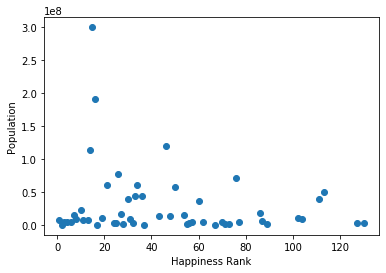

In [40]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,1])
plt.xlabel('Happiness Rank')
plt.ylabel('Population')
plt.show()

In [41]:
happiness = cleaned_base_df.iloc[:,7]
population = cleaned_base_df.iloc[:,1]
correlation = st.pearsonr(happiness,population)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.17


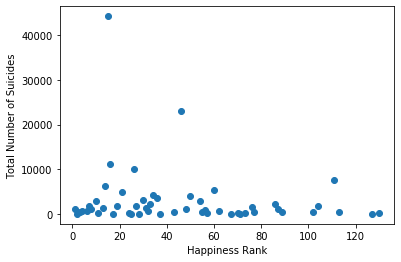

In [14]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,2])
plt.xlabel('Happiness Rank')
plt.ylabel('Total Number of Suicides')
plt.show()

In [42]:
happiness = cleaned_base_df.iloc[:,7]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(happiness,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.15


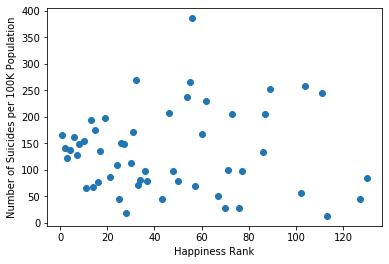

In [15]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,3])
plt.xlabel('Happiness Rank')
plt.ylabel('Number of Suicides per 100K Population')
plt.show()

In [43]:
happiness = cleaned_base_df.iloc[:,7]
suicides_100k = cleaned_base_df.iloc[:,3]
correlation = st.pearsonr(happiness,suicides_100k)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.0


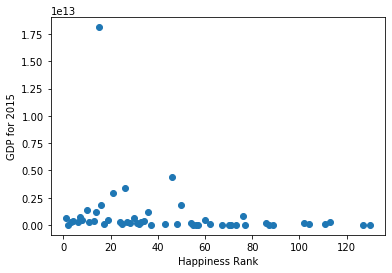

In [16]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,4])
plt.xlabel('Happiness Rank')
plt.ylabel('GDP for 2015')
plt.show()

In [44]:
happiness = cleaned_base_df.iloc[:,7]
GDP = cleaned_base_df.iloc[:,4]
correlation = st.pearsonr(happiness,GDP)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.2


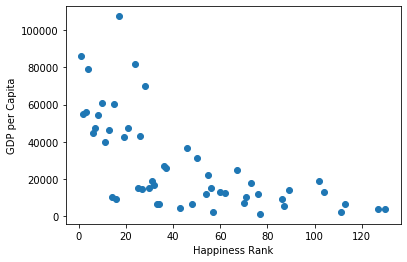

In [17]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,5])
plt.xlabel('Happiness Rank')
plt.ylabel('GDP per Capita')
plt.show()

In [45]:
happiness = cleaned_base_df.iloc[:,7]
GDP_per_capita = cleaned_base_df.iloc[:,5]
correlation = st.pearsonr(happiness,GDP_per_capita)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.65


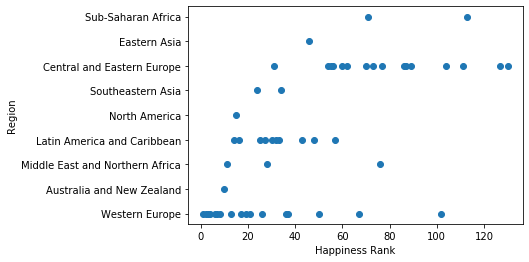

In [18]:
#Comparing Happiness Rank with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,7],cleaned_base_df.iloc[:,6])
plt.xlabel('Happiness Rank')
plt.ylabel('Region')
plt.show()

In [46]:
happiness = cleaned_base_df.iloc[:,7]
region = cleaned_base_df.iloc[:,6]
correlation = st.pearsonr(happiness,region)
print(f"The correlation between both factors is {round(correlation[0],2)}")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [62]:
cleaned_base_df.head()

,country,Population,Total Number of Suicides,Number of Suicides per 100K Population,GDP for 2015,GDP per Capita,region,happiness rank
54,Switzerland,7892502,1073,164.66,6.792892e+11,86068,Western Europe,1.0
24,Iceland,308554,40,140.65,1.694225e+10,54909,Western Europe,2.0
14,Denmark,5383060,564,121.42,3.012985e+11,55972,Western Europe,3.0
38,Norway,4882909,590,136.43,3.866631e+11,79187,Western Europe,4.0
17,Finland,5181797,731,161.19,2.324648e+11,44862,Western Europe,6.0


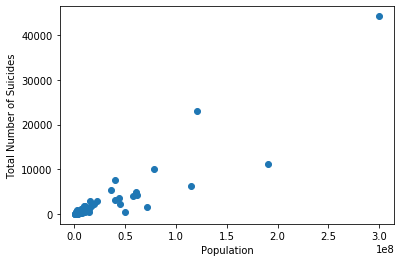

In [22]:
#Comparing Total Suicides with Unique Suicide Data
plt.scatter(cleaned_base_df.iloc[:,1],cleaned_base_df.iloc[:,2])
plt.xlabel('Population')
plt.ylabel('Total Number of Suicides')
plt.show()

In [56]:
population = cleaned_base_df.iloc[:,1]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(population,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.9


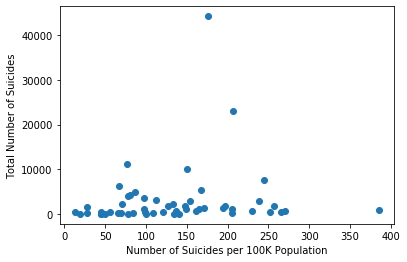

In [48]:
plt.scatter(cleaned_base_df.iloc[:,3],cleaned_base_df.iloc[:,2])
plt.xlabel('Number of Suicides per 100K Population')
plt.ylabel('Total Number of Suicides')
plt.show()

In [57]:
suicides_100k = cleaned_base_df.iloc[:,3]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(suicides_100k,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.13


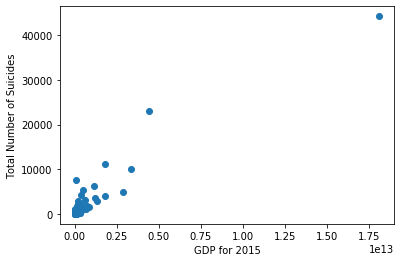

In [49]:
plt.scatter(cleaned_base_df.iloc[:,4],cleaned_base_df.iloc[:,2])
plt.xlabel('GDP for 2015')
plt.ylabel('Total Number of Suicides')
plt.show()

In [58]:
GDP = cleaned_base_df.iloc[:,4]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(GDP,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.94


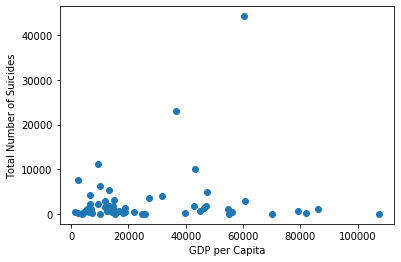

In [50]:
plt.scatter(cleaned_base_df.iloc[:,5],cleaned_base_df.iloc[:,2])
plt.xlabel('GDP per Capita')
plt.ylabel('Total Number of Suicides')
plt.show()

In [59]:
GDP_capita = cleaned_base_df.iloc[:,5]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(GDP_capita,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.12


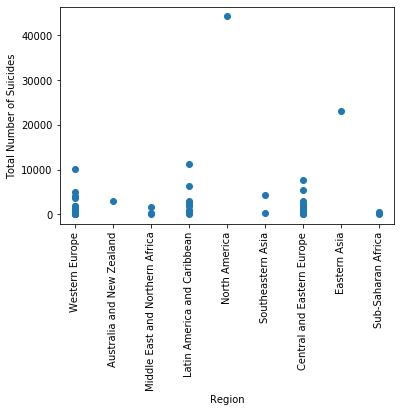

In [54]:
plt.scatter(cleaned_base_df.iloc[:,6],cleaned_base_df.iloc[:,2])
plt.xlabel('Region')
plt.ylabel('Total Number of Suicides')
plt.xticks(rotation=90)
plt.show()

In [60]:
regions = cleaned_base_df.iloc[:,6]
suicides = cleaned_base_df.iloc[:,2]
correlation = st.pearsonr(regions,suicides)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'